In [1]:
from io import StringIO

import matplotlib.pyplot as plt
import numpy as np
from Util import Util
from DataEncoder import DataEncoder
from HiperparameterTester import HiperparameterTester

In [2]:
datasetFileName = 'ObesityData.csv'
ordinalFeaturesMappers = {
    ("CAEC", "CALC"): ["no", "Sometimes", "Frequently", "Always"]
}

**Loading Data**

In [3]:
rawData = Util.loadDatasetFrom(datasetFileName)

**Preprocessing Data**

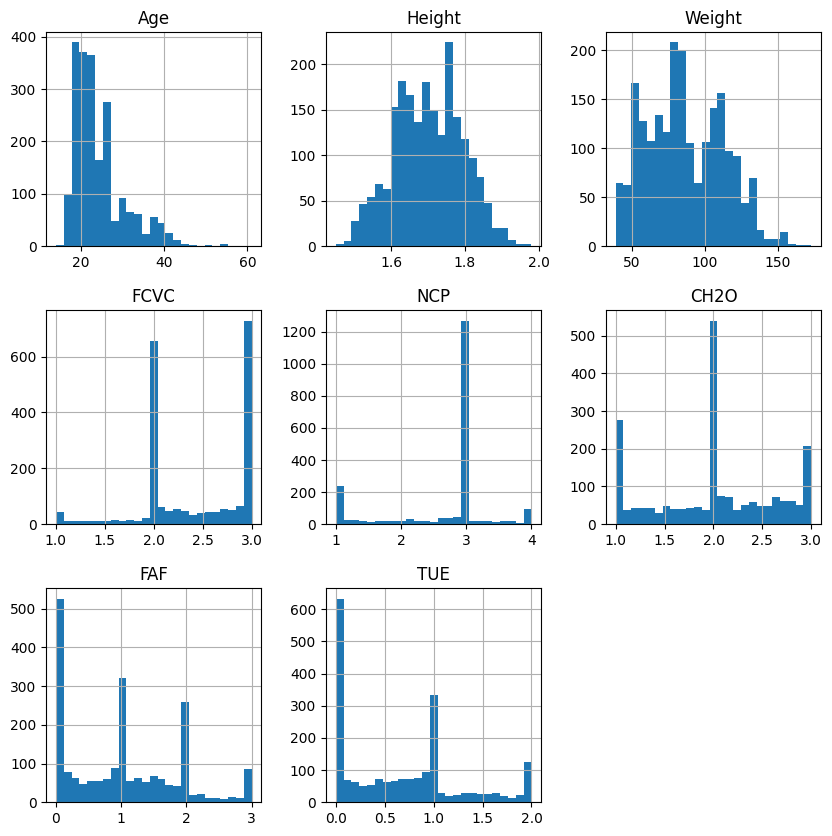

Any missing values?  False


In [4]:
rawData.hist(bins=25,figsize=(10,10))
plt.show()

print("Any missing values? ", rawData.isnull().values.any())

dataEncoder = DataEncoder(rawData, ordinalFeaturesMappers)
preparedData = dataEncoder.encodeData()

**Basic Tree**

In [5]:
tester = HiperparameterTester(preparedData)
tester.testModel()
accuracyList = tester.getAccuracies()
nodeCountList = tester.getNodeCounts()
print("Mean accuracy:", np.mean(accuracyList))
print("Standard deviation:", np.std(accuracyList))
print("Mean number of nodes:", np.mean(nodeCountList))

Mean accuracy: 0.9149709380309399
Standard deviation: 0.01899430081946323
Mean number of nodes: 299.28


**Max Depth**

In [6]:
max_MAX_DEPTH = 12

means = []

for maxDepth in range(1, max_MAX_DEPTH+1):
    tester.setMaxDepth(maxDepth)
    tester.testModel()

    accuracyList = tester.getAccuracies()
    nodeCountList = tester.getNodeCounts()

    means.append(np.mean(accuracyList))

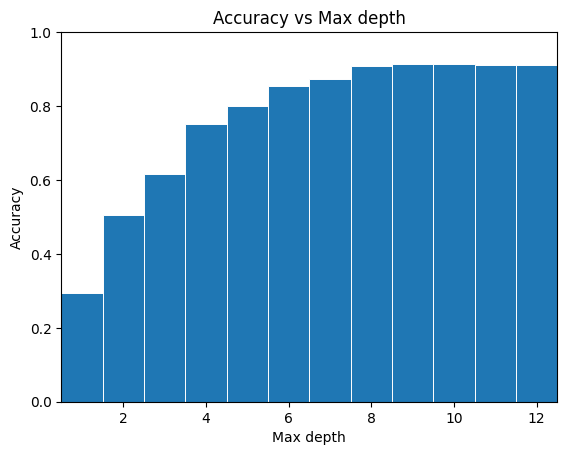

In [7]:
fig, ax = plt.subplots()

ax.bar([i for i in range(1, max_MAX_DEPTH+1)], means, width=1, edgecolor="white", linewidth=0.7)

ax.set(ylim=(0, 1), xlim=(0.5,max_MAX_DEPTH+0.5), xlabel="Max depth", ylabel="Accuracy", title="Accuracy vs Max depth")

plt.show()

**Reducing feature dimensions**

In [8]:
def findBestFeatures(encoder, tester, minAcc = 0):
    bestAcc = 1
    features = encoder.getFeatures()
    ftAbandoned = []
    while bestAcc > minAcc and len(features) > 1:
        bestIndex = 0
        bestAcc = 0
        bestStd = 0
        bestSize = 0
        for index, feature in enumerate(features):
            ftAbandoned.append(feature)
            tester.setDataset(encoder.encodeData(ftAbandoned))
            ftAbandoned.remove(feature)
            tester.testModel()
            
            accuracyList = tester.getAccuracies()
            nodeCountList = tester.getNodeCounts()    

            meanAccuracy = np.mean(accuracyList)
            standatdDeviation = np.std(accuracyList)
            meanSize = np.mean(nodeCountList)

            if meanAccuracy > bestAcc:
                bestIndex = index
                bestAcc = meanAccuracy
                bestStd = standatdDeviation
                bestSize = meanSize

        print("Feature abandoned: ", features[bestIndex])
        print("Mean accuracy: ", bestAcc)
        print("Standard deviation: ", bestStd)
        print("Mean node count: ", bestSize)

        ftAbandoned.append(features[bestIndex])
        features.pop(bestIndex)
    
    print("Features left: ", features)
    print("Features abandoned: ", ftAbandoned)

In [9]:
encoder = DataEncoder(rawData, ordinalFeaturesMappers)
tester = HiperparameterTester() 

findBestFeatures(encoder, tester, 0)

Feature abandoned:  Age
Mean accuracy:  0.9198495484217115
Standard deviation:  0.019430247547101417
Mean node count:  291.06
Feature abandoned:  FAF
Mean accuracy:  0.9238256728963605
Standard deviation:  0.01938600955729281
Mean node count:  291.84
Feature abandoned:  TUE
Mean accuracy:  0.9253433783421263
Standard deviation:  0.017788165354621466
Mean node count:  291.16
Feature abandoned:  MTRANS
Mean accuracy:  0.9303163283555398
Standard deviation:  0.018786895140846298
Mean node count:  287.34
Feature abandoned:  Gender
Mean accuracy:  0.9330164088348386
Standard deviation:  0.01683309258140874
Mean node count:  288.08
Feature abandoned:  CH2O
Mean accuracy:  0.9345870964857371
Standard deviation:  0.017215227286968317
Mean node count:  292.2
Feature abandoned:  FAVC
Mean accuracy:  0.9370439506393633
Standard deviation:  0.01586105472890259
Mean node count:  275.6
Feature abandoned:  FCVC
Mean accuracy:  0.9391339533220063
Standard deviation:  0.01685152116804976
Mean node coun

In [19]:
encoder = DataEncoder(rawData, ordinalFeaturesMappers)
tester = HiperparameterTester() 
tester.setDataset(encoder.encodeData(["Weight", "Height"]))
tester.testModel()
accuracies = tester.getAccuracies()
sizes = tester.getNodeCounts()
print("Accuracy: ", np.mean(accuracies))
print("Std deviation: ", np.std(accuracies))
print("Size: ", np.mean(sizes))

Accuracy:  0.7150286148618439
Std deviation:  0.030288271993055563
Size:  926.54


**Generating Tree Graph**

In [10]:
# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('tree.png')
# Image(graph.create_png())